## Tidy Tuesday: Malaria dataset visualizations 

Some plots from [this tidy Tuesday](https://github.com/rfordatascience/tidytuesday/tree/master/data/2018/2018-11-13) data set.

October 2nd, 2020

-----------

### 0. Setup and Get Data 

In [1]:
%matplotlib inline 
import pandas as pd 
import seaborn as sns 
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"

In [2]:
# Looking at the dataset corresponding to Malaria deaths by age across
# the world and time. 
malaria_deaths_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths_age.csv"
malaria_deaths_df = pd.read_csv(malaria_deaths_url)
malaria_deaths_df

,Unnamed: 0,entity,code,year,age_group,deaths
0,1,Afghanistan,AFG,1990,Under 5,184.606435
1,2,Afghanistan,AFG,1991,Under 5,191.658193
2,3,Afghanistan,AFG,1992,Under 5,197.140197
3,4,Afghanistan,AFG,1993,Under 5,207.357753
4,5,Afghanistan,AFG,1994,Under 5,226.209363
...,...,...,...,...,...,...
30775,30776,Zimbabwe,ZWE,2012,50-69,103.185111
30776,30777,Zimbabwe,ZWE,2013,50-69,100.113293
30777,30778,Zimbabwe,ZWE,2014,50-69,99.013890
30778,30779,Zimbabwe,ZWE,2015,50-69,98.091738


### 1. How much do malaria deaths change across age groups by year?

In [3]:
# First, what are the age groups? 
malaria_deaths_df["age_group"].unique()

array(['Under 5', '70 or older', '5-14', '15-49', '50-69'], dtype=object)

Text(0.5, 1.0, 'Malaria deaths across time, by age group')

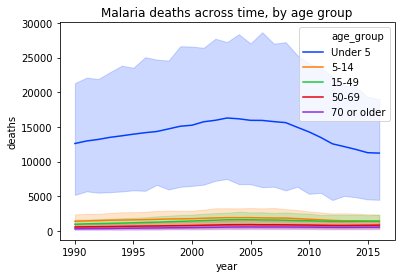

In [4]:
# orders for age group, so they make sense
age_orders = ["Under 5", "5-14", "15-49", "50-69", "70 or older"]
(
    sns.
    lineplot(x="year", y="deaths",
             hue="age_group", 
             hue_order = age_orders,
             palette="bright",
             data=malaria_deaths_df).
    set_title("Malaria deaths across time, by age group")
)

Wow, deaths in the "Under 5" age group seem disproportionately high. We can see in the plot above that there is some variation by year, but on the whole deaths in the under 5 group range between 12,000-15,000 or so. So, let's take the average in the under 5 age group and see if there are any patterns by country. 

### 2. How does average death rate in the under 5 age group vary by country? 

First, what are the countries represented? Any non-countries included in the country column? 

In [5]:
malaria_deaths_df["entity"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australasia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central Asia', 'Central Europe',
       'Central Latin America', 'Central Sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia', 'Eastern Europe',
       'Eastern Sub-Saharan Africa', 'Ecuador', 'E

Mostly seems fine, but let's exclude regions (eg. "World", "Sub-Saharan Africa", etc) since we just want to look at this by country. We also need to reorganize the data a little, because we only want the under 5 data, and we want it averaged by year. 

In [6]:
# Get under 5 data only 
malaria_under5_deaths = malaria_deaths_df.loc[malaria_deaths_df["age_group"] == "Under 5"]

# Remove regions from the "entity" (ie. country) column 
regions_to_exclude = ["Andean Latin America",
                      "Australasia",
                      "Central Asia", 
                      "Central Europe",
                      "Central Latin America", 
                      "Central Sub-Saharan Africa",
                      "East Asia", 
                      "Eastern Europe",
                      "Eastern Sub-Saharan Africa",
                      "High SDI", 
                      "High-income Asia Pacific", 
                      "High-middle SDI",
                      "Latin America and Caribbean",
                      "Low SDI", 
                      "Low-middle SDI",
                      "Middle SDI",
                      "North Africa and Middle East",
                      "North America",
                      "South Asia",
                      "Southeast Asia",
                      "Southern Latin America", 
                      "Southern Sub-Saharan Africa",
                      "Sub-Saharan Africa",
                      "Tropical Latin America",
                      "Western Europe",
                      "Western Sub-Saharan Africa",
                      "World"]
malaria_under5_deaths = malaria_under5_deaths.loc[~malaria_under5_deaths["entity"].isin(regions_to_exclude)]

# Get the average number of deaths by country
malaria_under5_avg_deaths = malaria_under5_deaths.groupby("entity").mean()

Let's reset the index (we need it as a column), round the number of deaths for readability, and add a `text` column (for what is shown upon hover) combining the Country and average death values: 

In [7]:
malaria_under5_avg_deaths.reset_index(inplace=True)
malaria_under5_avg_deaths = malaria_under5_avg_deaths.round(2)
malaria_under5_avg_deaths["text"] = malaria_under5_avg_deaths["entity"] + ": " + malaria_under5_avg_deaths["deaths"].astype(str)
malaria_under5_avg_deaths.head()

,entity,Unnamed: 0,year,deaths,text
0,Afghanistan,14,2003,315.89,Afghanistan: 315.89
1,Albania,41,2003,0.00,Albania: 0.0
2,Algeria,68,2003,0.50,Algeria: 0.5
3,American Samoa,95,2003,0.00,American Samoa: 0.0
4,Andorra,149,2003,0.00,Andorra: 0.0


In [8]:
malaria_under5_deaths.loc[malaria_under5_deaths["deaths"] == malaria_under5_deaths["deaths"].max()]

,Unnamed: 0,entity,code,year,age_group,deaths
3906,3907,Nigeria,NGA,2008,Under 5,261794.558211


In [12]:
import os 
os.getcwd()

'/Users/oana/Documents/github/oena.github.io/ipynbs'

In [13]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = malaria_under5_avg_deaths["entity"],
    z = malaria_under5_avg_deaths["deaths"],
    text = malaria_under5_avg_deaths["text"],
    autocolorscale=True,
    reversescale=False,
    colorbar_title = 'Average under 5 malaria deaths',
))

fig.update_layout(
    title_text='Average under 5 malaria deaths by country: 1990-2016',
    geo=dict(
        showcoastlines=True,
    ),
)
# Write to html so you can see it outside of this notebook 
fig.write_html("/Users/oana/Documents/github/oena.github.io/assets/html/world_malaria_map.html")

It's very clear from this plot that Nigeria has far and away more cases of malaria in children under 5 than any other country in the world; unsurprisingly (given that malaria is spread through mosquitos), geographically close countries like Niger, Cameroon, and Burkina Faso have high average death rates in young children too. 

It is worth noting that Nigeria is Africa's most populous country; so, in following up on this in more depth it would probably make sense to normalize these values by population size. However, [this health policy report](http://www.hcs.harvard.edu/epihc/currentissue/Fall2001/carrington.htm) notes that Nigeria has a number of specific issues that make malaria such a significant problem in its population: 

> Most of the rural areas do not have access to good health care systems. Usually there are no accessible roads to the health centers, which in turn are poorly equipped and have inadequate drugs for malaria treatment. Drug resistant malaria is common and anti malarial drugs are becoming less effective as the plasmodium parasite develops resistance to affordable drugs. This poses a serious threat to clinical management and treatment of malaria. People cannot afford anti-malarial drugs so they tend to self medicate with local herbs. Children wear little clothing during the day and at night due to heat and humidity, thus leaving their bodies exposed to mosquito bites. Rural dwellers cannot afford to purchase bed nets. Mud houses are poorly constructed and are surrounded by bushes. Water is collected from streams and wells and left standing in open clay pots since there are usually no running taps. Recommendations to Control Malaria in Rural Nigeria Within the control strategy for malaria, a multi-dimensional approach is needed.

This brings us to our last question (for this visualization exercise): 

### 3. How similar are malaria death rates (again for the under 5 age group) in Nigeria vs. the other countries close to it over time? 

For this, we'll consider Cameroon, Niger, Benin, Chad, Central African Republic, Mali, Ghana, Togo, and Benin. 

We begin by filtering the under 5 data set to these countries only, and then correlating values over time (using Spearman correlation since the death rates are on such different scales): 

In [10]:
# Filter to relevant countries 
countries_close_to_nigeria = ["Nigeria",
                              "Cameroon", 
                              "Niger", 
                              "Benin", 
                              "Chad", 
                              "Central African Republic", 
                              "Mali", 
                              "Ghana", 
                              "Togo"]
nigeria_neighbors_under5_deaths = malaria_under5_deaths.loc[malaria_under5_deaths["entity"].isin(countries_close_to_nigeria)]

# Pivot data frame to wide
nigeria_neighbors_under5_deaths = nigeria_neighbors_under5_deaths.pivot(index='year', columns='entity', values='deaths')

# Correlate deaths by year across countries considered
nigeria_neighbors_under5_cors = nigeria_neighbors_under5_deaths.corr(method="spearman")

Text(0.5, 0.98, 'Correlation of malaria deaths: 1990-2016, children under 5')

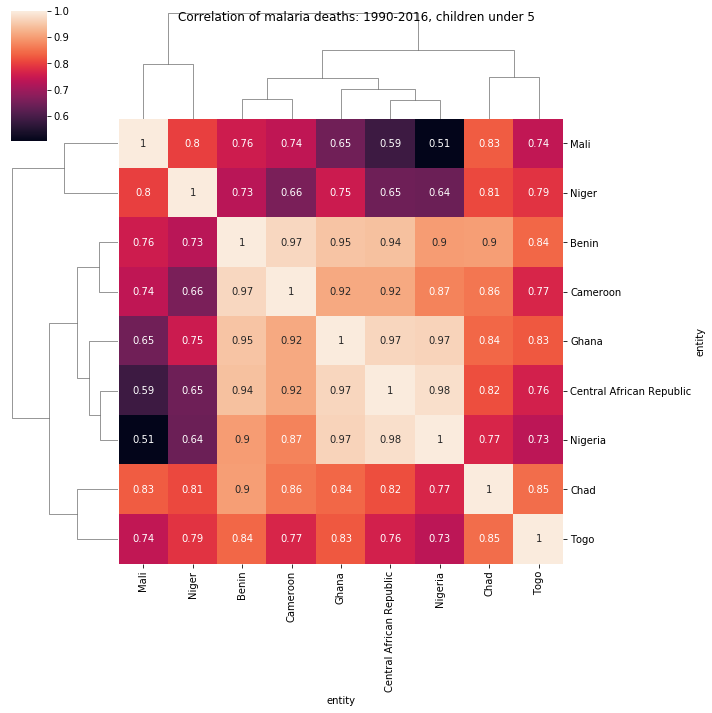

In [11]:
p =sns.clustermap(nigeria_neighbors_under5_cors, annot=True)
p.fig.suptitle("Correlation of malaria deaths: 1990-2016, children under 5") 

Unsurprisingly, all of the correlation values are fairly high; however, it's surprising that Nigeria's malaria death rates (in the under 5 age group) are most correlated with Ghana and the Central African Republic, which do not immediately border it. 